In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection, metrics, preprocessing
from sklearn.decomposition import PCA
from sklearn import tree

import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import Image

%matplotlib inline

## Preprocess

In [4]:
raw_df = pd.read_csv('Heart.csv', index_col=0)

In [5]:
print(raw_df.describe())
print(raw_df.columns)

print(raw_df.isnull().sum())
raw_df.dropna(inplace=True)
print(raw_df.isnull().sum())

              Age         Sex      RestBP        Chol         Fbs     RestECG  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868  131.689769  246.693069    0.148515    0.990099   
std      9.038662    0.467299   17.599748   51.776918    0.356198    0.994971   
min     29.000000    0.000000   94.000000  126.000000    0.000000    0.000000   
25%     48.000000    0.000000  120.000000  211.000000    0.000000    0.000000   
50%     56.000000    1.000000  130.000000  241.000000    0.000000    1.000000   
75%     61.000000    1.000000  140.000000  275.000000    0.000000    2.000000   
max     77.000000    1.000000  200.000000  564.000000    1.000000    2.000000   

            MaxHR       ExAng     Oldpeak       Slope          Ca  
count  303.000000  303.000000  303.000000  303.000000  299.000000  
mean   149.607261    0.326733    1.039604    1.600660    0.672241  
std     22.875003    0.469794    1.161075    0.616226    0.937438 

In [4]:
def col_count_plot(col):
    data = raw_df[col]
    names = data.value_counts().index
    values = data.value_counts().values
    pos = range(len(values))
    plt.bar(pos, values)
    plt.xticks(pos, names)
    plt.ylabel('Count')
    plt.title(col)

In [19]:
new_index = np.random.permutation(len(raw_df))
subset = new_index[:10]
print(subset)
raw_df.iloc[subset,:]

[126 280   9 139  90 272 184 274 149  33]


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
128,54,1,asymptomatic,110,239,0,0,126,1,2.8,2,1.0,reversable,Yes
285,61,1,asymptomatic,148,203,0,0,161,0,0.0,1,1.0,reversable,Yes
10,53,1,asymptomatic,140,203,1,2,155,1,3.1,3,0.0,reversable,Yes
141,59,1,nontypical,140,221,0,0,164,1,0.0,1,0.0,normal,No
92,62,0,asymptomatic,160,164,0,2,145,0,6.2,3,3.0,reversable,Yes
277,66,0,nonanginal,146,278,0,2,152,0,0.0,2,1.0,normal,No
187,42,1,nonanginal,120,240,1,0,194,0,0.8,3,0.0,reversable,No
279,57,1,nontypical,154,232,0,2,164,0,0.0,1,1.0,normal,Yes
151,52,1,typical,152,298,1,0,178,0,1.2,2,0.0,reversable,No
34,59,1,asymptomatic,135,234,0,0,161,0,0.5,2,0.0,reversable,No


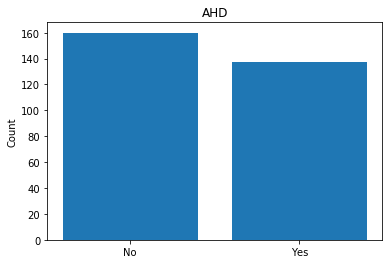

In [5]:
col_count_plot('AHD')

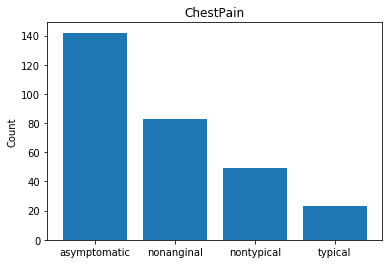

In [6]:
col_count_plot('ChestPain')

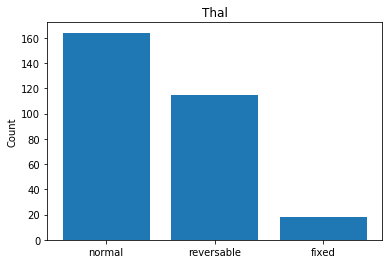

In [7]:
col_count_plot('Thal')

([<matplotlib.axis.YTick at 0x7f8e0d46c550>,
 <a list of 18 Text yticklabel objects>)

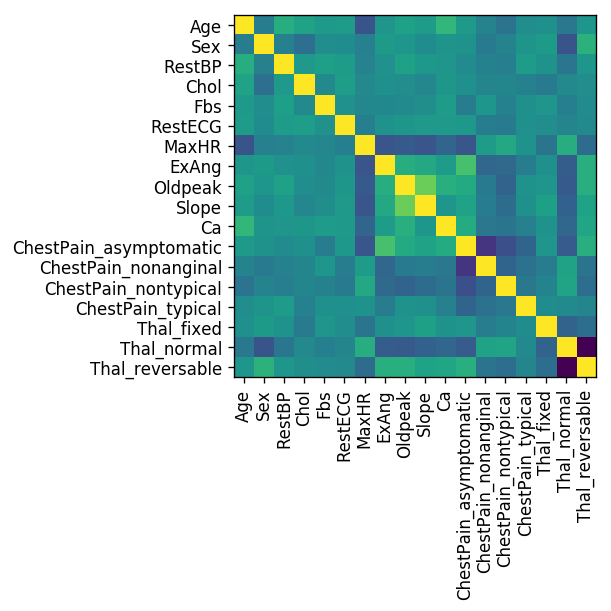

In [8]:
df = pd.get_dummies(raw_df, columns=['ChestPain', 'Thal'])
names =[col for col in df.columns if col != 'AHD'] 
X = df[names]
y = np.where(df['AHD']=="Yes", 1, 0)

plt.figure(dpi=120)
plt.imshow(X.corr().values)
plt.xticks(range(len(names)), names, rotation='vertical')
plt.yticks(range(len(names)), names, rotation='horizontal')

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=1337)
scaler = preprocessing.MinMaxScaler()
scaler.fit_transform(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression

In [10]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(model.predict_proba(X_test)[:,0])

[ 0.09056228  0.26706132  0.76811815  0.53586282  0.01953899  0.67293431
  0.28199179  0.30026811  0.01989907  0.38724714  0.60713433  0.92407995
  0.06889896  0.56477829  0.72165344  0.97685704  0.8453365   0.78573308
  0.938371    0.83191908  0.54835297  0.56475512  0.95395315  0.77921988
  0.09820103  0.63308034  0.82341812  0.17698376  0.87239716  0.96749288
  0.72244009  0.79072289  0.06189868  0.00993823  0.10458499  0.97848052
  0.10510196  0.70024309  0.9552665   0.62054823  0.90347536  0.90998917
  0.02942454  0.08583899  0.63189561  0.95982898  0.18629707  0.42217278
  0.93706242  0.06114171  0.17608188  0.01163039  0.84031568  0.08262568
  0.72989054  0.38146568  0.88513811  0.53765389  0.13717527  0.91090773
  0.73287325  0.88975167  0.95289554  0.54186628  0.03494748  0.13566632
  0.69527954  0.9633813   0.29900431  0.53397854  0.02152646  0.08053805
  0.46946416  0.92302687  0.2654201   0.91136366  0.80392097  0.02097671
  0.9364761   0.14882528  0.91347117  0.05744897  0

In [11]:
metrics.confusion_matrix(y_test, y_pred)
#            Predict No     Predict Yes
#Actual No
#Actual Yes

array([[43,  6],
       [14, 36]])

In [12]:
def logistic_scoring(X, y, scoring, seed=7):
    kfold = model_selection.KFold(n_splits=5, random_state=seed)
    model = LogisticRegression()
    results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    print("{0}: {1:.3f} ({2:.3f})".format(scoring, results.mean(), results.std()))

In [13]:
logistic_scoring(X, y, 'accuracy')
logistic_scoring(X, y, 'neg_log_loss')
logistic_scoring(X, y, 'roc_auc')

accuracy: 0.828 (0.060)
neg_log_loss: -0.384 (0.065)
roc_auc: 0.911 (0.029)


In [14]:
pca = PCA(n_components=2)
pca.fit_transform(X_train)
print(pca.components_)

[[ 0.05485691  0.26304018  0.04294757  0.0074609   0.04042639  0.06765749
  -0.09806053  0.34290629  0.11174016  0.13621377  0.13846988  0.43404747
  -0.25853682 -0.16228553 -0.01322512  0.04817489 -0.50212658  0.45395169]
 [-0.05561408  0.31350361 -0.01173794 -0.03703811  0.13496471 -0.4086092
   0.07574783 -0.27625082  0.00121402 -0.00606983 -0.06563937 -0.45597652
   0.36668762  0.04104649  0.04824241 -0.01862375 -0.36393744  0.38256119]]


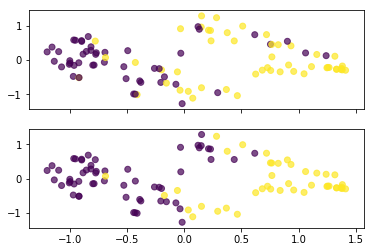

In [15]:
X_proj = pca.transform(X_test)

f, ax = plt.subplots(2, sharex=True)
ax[0].scatter(X_proj[:, 0], X_proj[:, 1], c=y_test, alpha=0.7)
ax[1].scatter(X_proj[:, 0], X_proj[:, 1], c=y_pred, alpha=0.7)

## Logistic Regression with Lasso

In [16]:
model_n1 = LogisticRegression(penalty='l1', C=0.1)
model_n1.fit(X_train,y_train)
y_pred_n1 = model_n1.predict(X_test)
print(model_n1.coef_)

model_n0 = LogisticRegression(penalty='l1', C=1)
model_n0.fit(X_train,y_train)
y_pred_n0 = model_n0.predict(X_test)
print(model_n0.coef_)

[[ 0.          0.          0.          0.          0.          0.          0.
   0.2211662   0.          0.          0.          0.84392444  0.          0.
   0.          0.         -1.15883446  0.        ]]
[[ 0.          0.84217781  0.          0.          0.          0.20419221
  -1.68248131  0.85623718  0.80660776  0.          3.20293837  1.16040066
  -0.59978788  0.          0.         -0.06315706 -0.94860406  0.27151771]]


In [17]:
#            Predict No     Predict Yes
#Actual No
#Actual Yes
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred_n1))
print(metrics.confusion_matrix(y_test, y_pred_n0))

[[43  6]
 [14 36]]
[[44  5]
 [23 27]]
[[41  8]
 [14 36]]


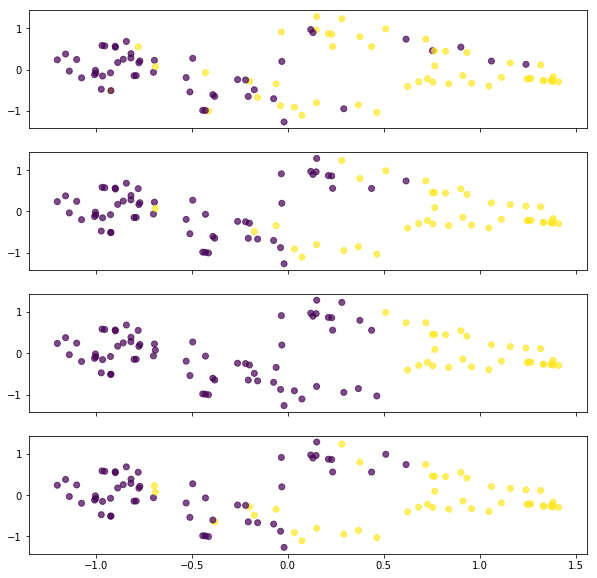

In [18]:
f, ax = plt.subplots(4, sharex=True, figsize=(10, 10))
ax[0].scatter(X_proj[:, 0], X_proj[:, 1], c=y_test, alpha=0.7)
ax[1].scatter(X_proj[:, 0], X_proj[:, 1], c=y_pred, alpha=0.7)
ax[2].scatter(X_proj[:, 0], X_proj[:, 1], c=y_pred_n1, alpha=0.7)
ax[3].scatter(X_proj[:, 0], X_proj[:, 1], c=y_pred_n0, alpha=0.7)

## Decision Trees

In [19]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_predict_tree = clf.predict(X_test)
clf.predict_proba(X_test)[:,0]

array([ 0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,
        0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,
        1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,
        1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
        1.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,
        0.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,
        1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.])

In [20]:
clf.score(X_test, y_test)

0.66666666666666663

In [21]:
clf.feature_importances_

array([ 0.06072582,  0.04069672,  0.03977081,  0.04213219,  0.        ,
        0.        ,  0.12473694,  0.04721446,  0.05755167,  0.01845294,
        0.15482036,  0.31655513,  0.01025163,  0.        ,  0.        ,
        0.00987194,  0.        ,  0.07721939])

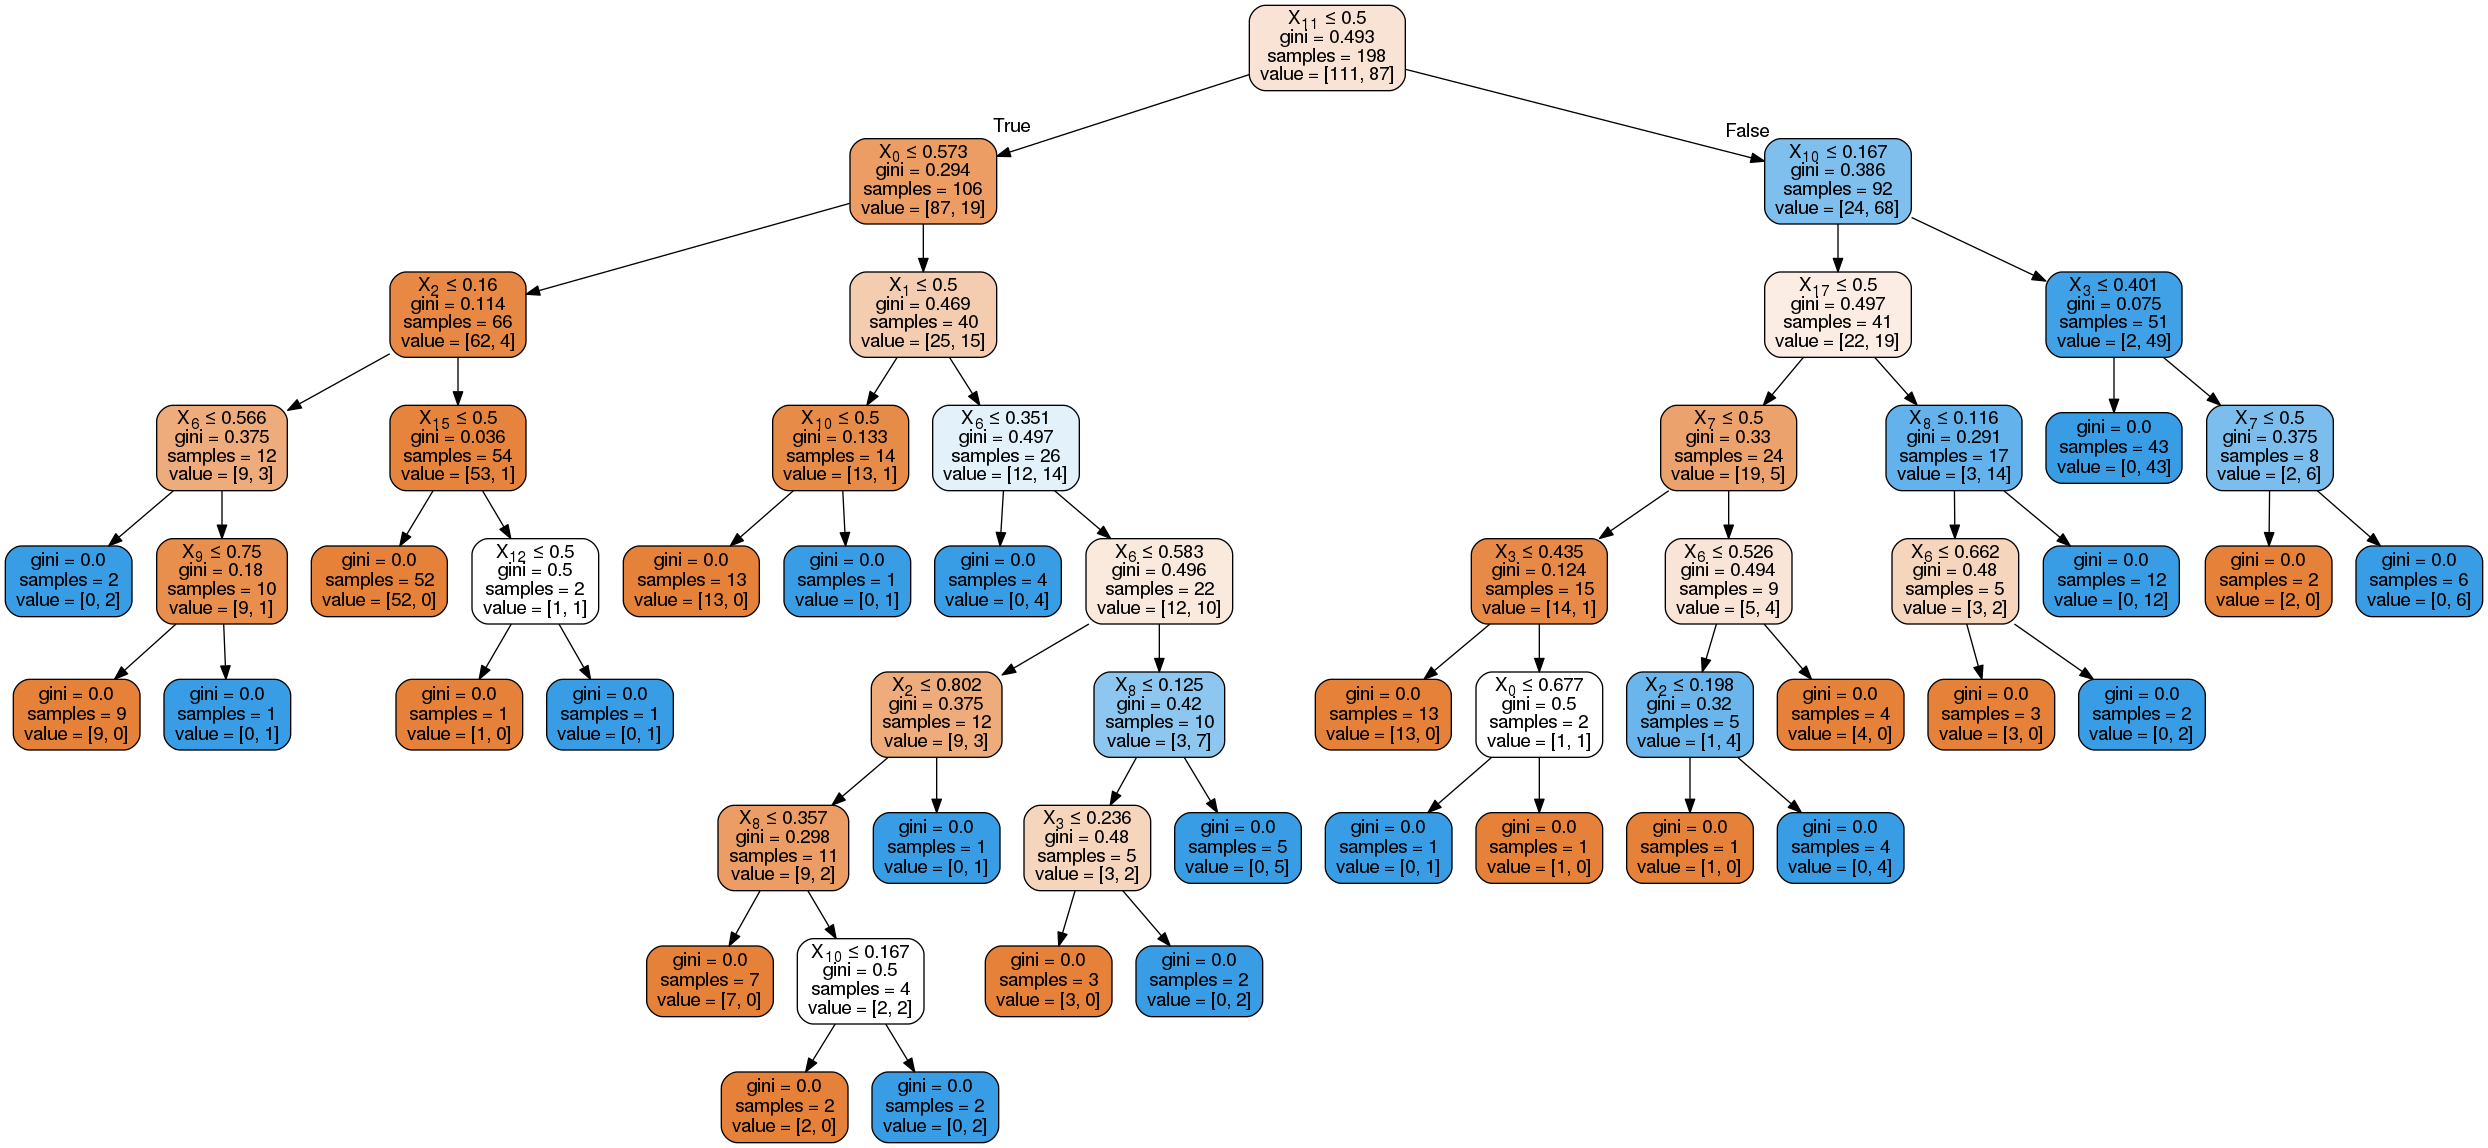

In [22]:
#https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [23]:
# Code below copied and lightly modified from:
# https://stackoverflow.com/questions/20224526/how-to-extract-the-decision-rules-from-scikit-learn-decision-tree

# Suggested solution actually found here:
# http://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [feature_names[i] for i in tree_.feature]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        print("{}#Node {}".format(indent, node))
        if tree_.feature[node] > 0:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

In [24]:
# tree_to_code(clf, names)

In [25]:
clf_min4 = tree.DecisionTreeClassifier(min_samples_leaf=4)
clf_min4.fit(X_train,y_train)
y_predict_tree_min4 = clf_min4.predict(X_test)
clf_min4.predict_proba(X_test)[:,0]

array([ 0.        ,  0.6       ,  1.        ,  0.        ,  0.        ,
        1.        ,  0.2       ,  0.        ,  0.        ,  0.2       ,
        1.        ,  0.6       ,  0.        ,  0.        ,  0.4       ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  0.        ,
        1.        ,  0.75      ,  0.        ,  1.        ,  1.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.75      ,  0.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        0.75      ,  0.8       ,  1.        ,  1.        ,  0.        ,
        0.        ,  0.5       ,  1.        ,  0.        ,  1.        ,
        0.6       ,  0.75      ,  0.        ,  0.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  0.        ,
        0.        ,  1.        ,  1.        ,  0.6       ,  1.  

In [26]:
clf_min4.score(X_test, y_test)

0.69696969696969702

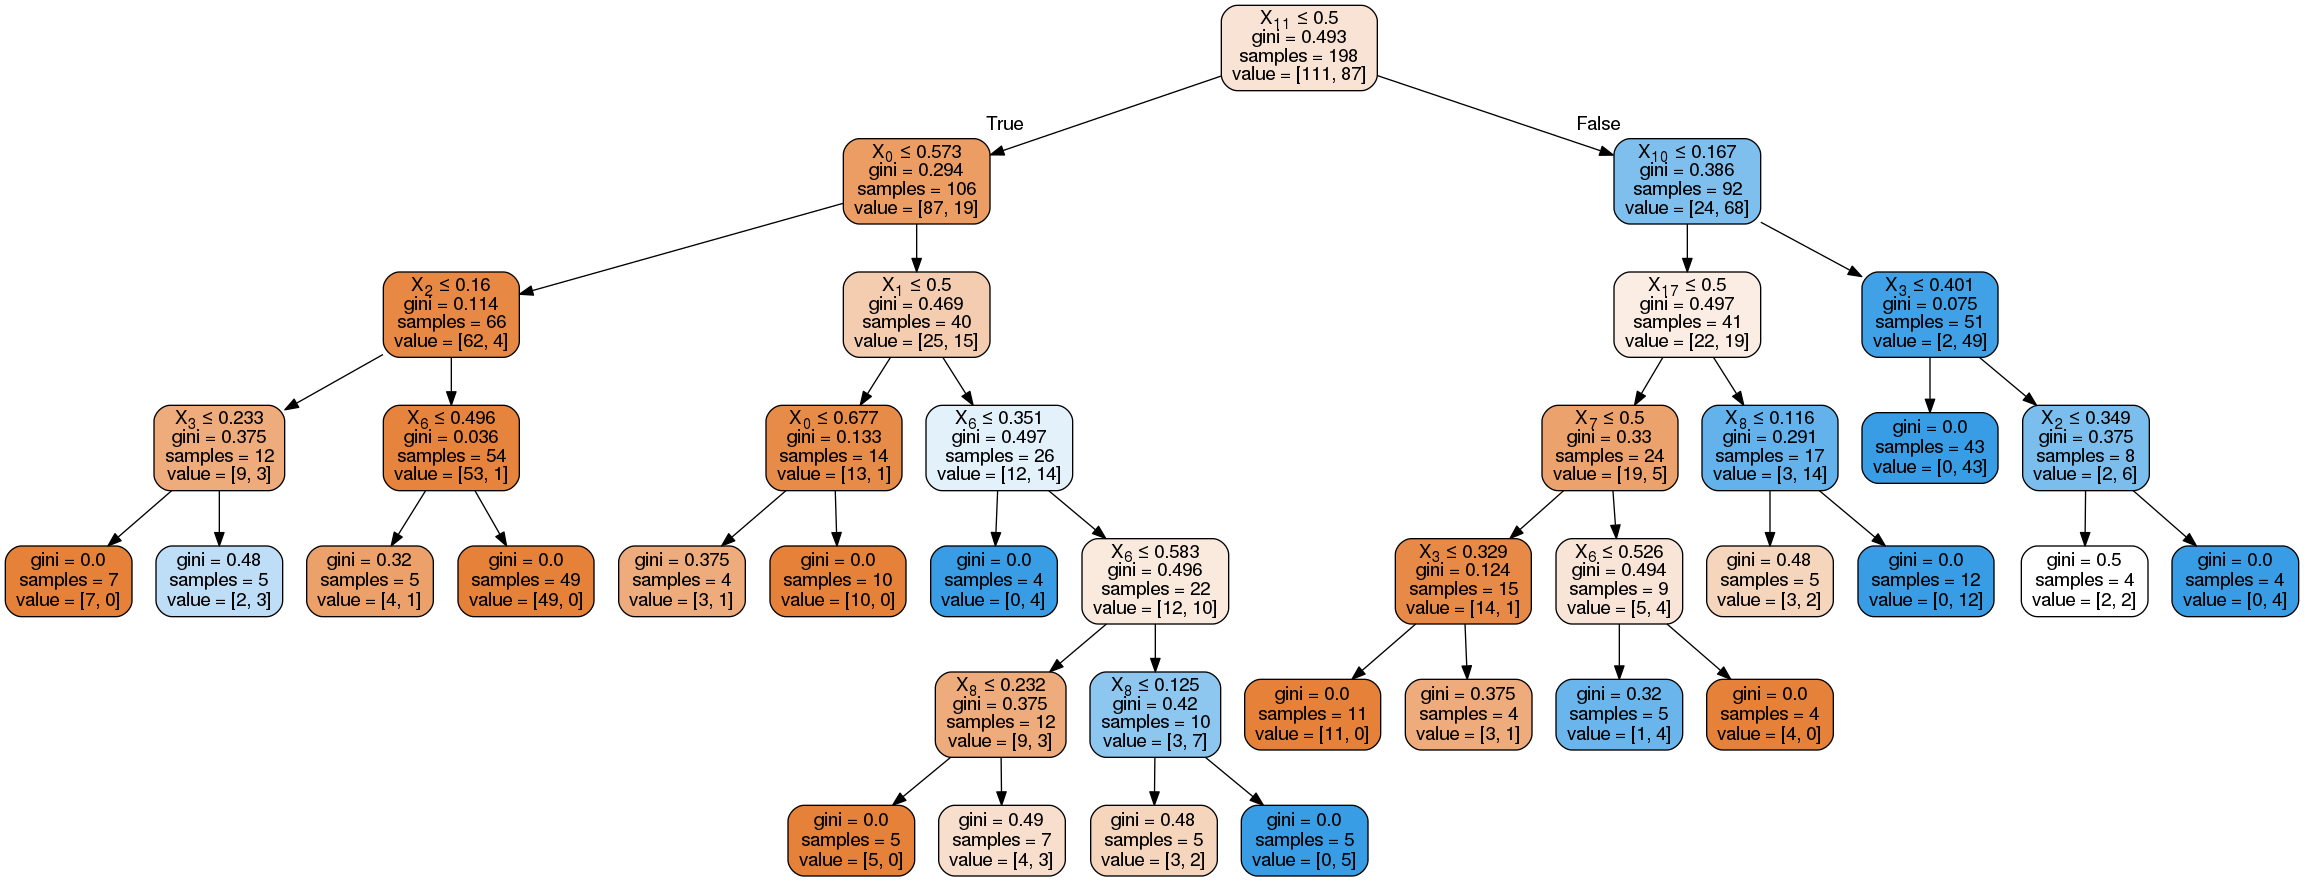

In [27]:
#https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176
dot_data = StringIO()
tree.export_graphviz(clf_min4, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [28]:
clf_giniLimit = tree.DecisionTreeClassifier(min_impurity_decrease=0.02)
clf_giniLimit.fit(X_train,y_train)
y_predict_tree_giniLimit = clf_giniLimit.predict(X_test)
clf_giniLimit.predict_proba(X_test)[:,0]
clf_giniLimit.score(X_test, y_test)

0.78787878787878785

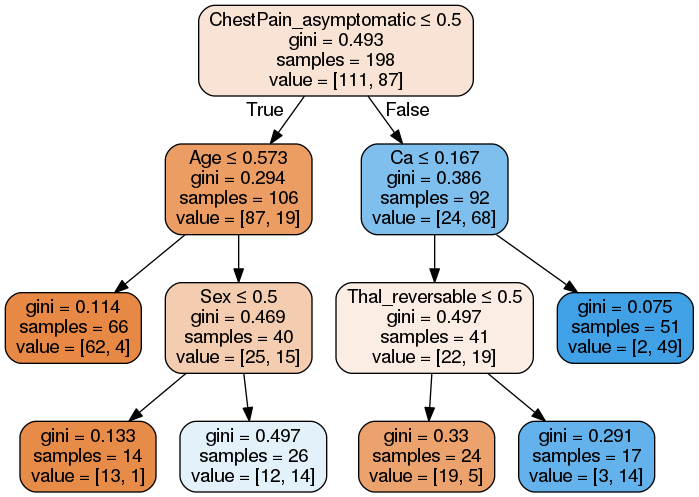

In [29]:
#https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176
dot_data = StringIO()
tree.export_graphviz(clf_giniLimit, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

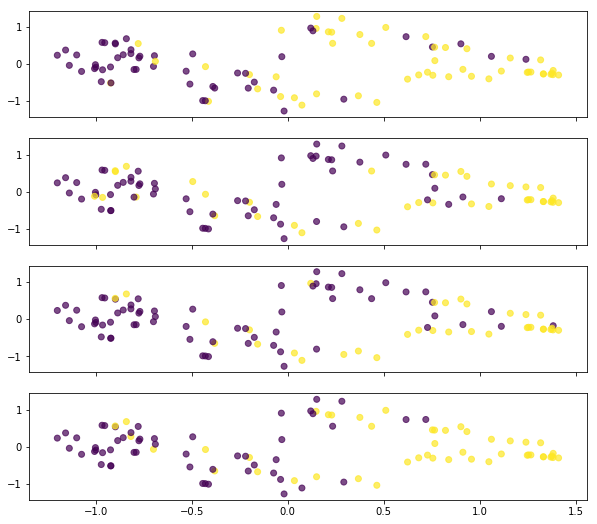

In [30]:
f, ax = plt.subplots(4, sharex=True, figsize=(10, 9))
ax[0].scatter(X_proj[:, 0], X_proj[:, 1], c=y_test, alpha=0.7)
ax[1].scatter(X_proj[:, 0], X_proj[:, 1], c=y_predict_tree, alpha=0.7)
ax[2].scatter(X_proj[:, 0], X_proj[:, 1], c=y_predict_tree_min4, alpha=0.7)
ax[3].scatter(X_proj[:, 0], X_proj[:, 1], c=y_predict_tree_giniLimit, alpha=0.7)

## Metric Compare
http://scikit-learn.org/stable/modules/model_evaluation.html

In [31]:
print(metrics.log_loss(y_test, y_predict_tree))
print(metrics.log_loss(y_test, y_predict_tree_min4))
print(metrics.log_loss(y_test, y_predict_tree_giniLimit))
print(metrics.log_loss(y_test, y_pred))
print(metrics.log_loss(y_test, y_pred_n1))
print(metrics.log_loss(y_test, y_pred_n0))
#-log P(yt|yp) = -(yt log(yp) + (1 - yt) log(1 - yp))

11.5130143091
10.4663524144
7.32647980475
6.97757904528
9.76858320247
7.67534825725


In [32]:
print(metrics.roc_auc_score(y_test, y_predict_tree))
print(metrics.roc_auc_score(y_test, y_predict_tree_min4))
print(metrics.roc_auc_score(y_test, y_predict_tree_giniLimit))
print(metrics.roc_auc_score(y_test, y_pred))
print(metrics.roc_auc_score(y_test, y_pred_n1))
print(metrics.roc_auc_score(y_test, y_pred_n0))

0.667755102041
0.698571428571
0.788163265306
0.798775510204
0.718979591837
0.778367346939
